In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##16. What is the survival rate for families (passengers with SibSp or Parch > 0) vs. solo travelers?

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic['IsFamily'] = (titanic['sibsp']> 0) | (titanic['parch'] > 0)

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,IsFamily
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False


In [7]:
survival_rate_family = titanic [titanic['IsFamily']]['survived'].mean()

In [8]:
titanic [titanic['IsFamily']]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,IsFamily
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,True
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,True


In [9]:
survival_rate_family

0.5056497175141242

In [10]:
survival_rate_solo_traveler = titanic[~titanic['IsFamily']]['survived'].mean()

In [11]:
survival_rate_solo_traveler

0.30353817504655495

<Axes: >

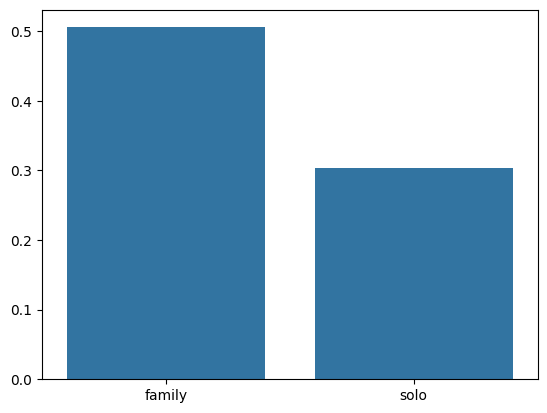

In [12]:
sns.barplot(x = ['family', 'solo'], y= [survival_rate_family,survival_rate_solo_traveler])

#17. What is the distribution of family sizes among passengers, and how does it affect survival?

In [13]:
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch']+ 1

In [14]:
titanic['FamilySize']

,FamilySize
0,2
1,2
2,1
3,2
4,1
...,...
886,1
887,1
888,4
889,1


In [15]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,IsFamily,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,1


<Axes: xlabel='FamilySize', ylabel='count'>

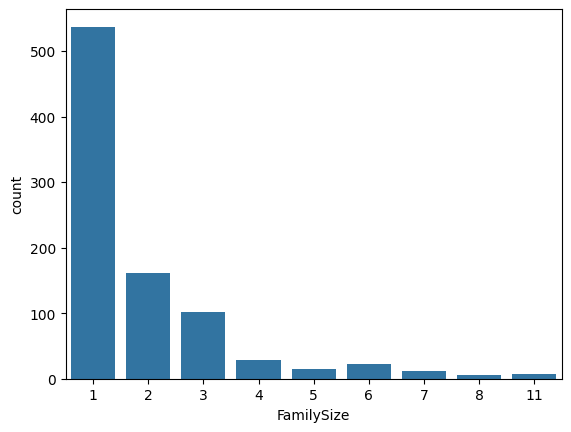

In [16]:
sns.countplot(x = 'FamilySize', data = titanic)

In [17]:
#as i seen in the family size after 8 directly showing 11. so is there data is missing?

In [18]:
#lets check it first

In [19]:
titanic['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [20]:
#as we seen there is no one who travele with their family count 9 and 10
#lets find out the total count of traveles

In [21]:
titanic['FamilySize'].value_counts()

,count
FamilySize,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


<Axes: xlabel='FamilySize', ylabel='survived'>

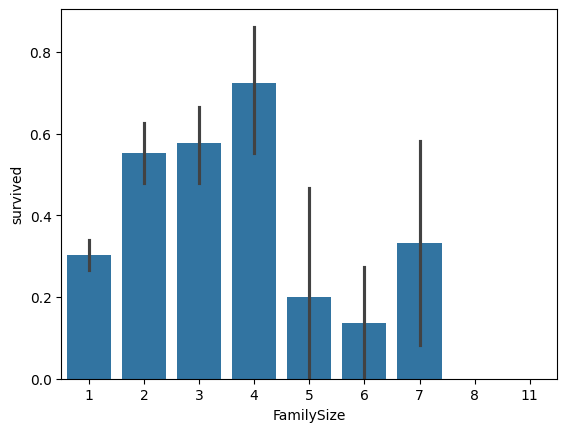

In [22]:
sns.barplot(x = 'FamilySize', y = 'survived', data = titanic)

#18. How does survival differ for passengers who paid exceptionally high fares (Fare outliers)?

In [23]:
titanic['fare'].describe()

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: ylabel='fare'>

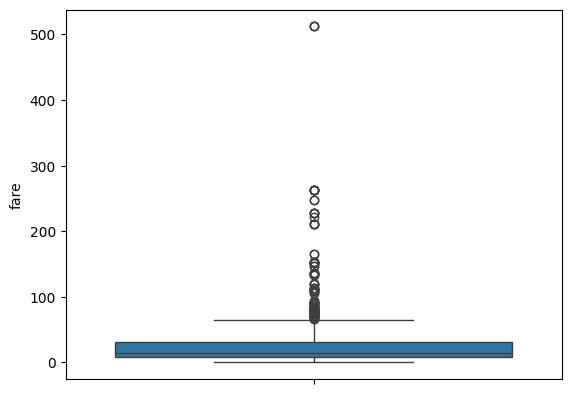

In [24]:
sns.boxplot(titanic['fare'])

In [25]:
#lets find out the IQR

In [26]:
Q1 = titanic['fare'].quantile(0.25)

In [27]:
Q3 = titanic['fare'].quantile(0.75)

In [28]:
IQR = Q3-Q1

In [29]:
lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

In [30]:
lower_bound

-26.724

In [31]:
upper_bound

65.6344

In [32]:
outliers = titanic[titanic['fare'] > upper_bound]

In [33]:
non_outliers = titanic[titanic['fare'] <= upper_bound]

In [34]:
outliers['survived'].value_counts()

,count
survived,
1,79
0,37


In [35]:
outliers['survived'].value_counts()

,count
survived,
1,79
0,37


In [36]:
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,IsFamily,FamilySize
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True,2
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False,True,6
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False,True,2
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False,True,2
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False,True,11
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False,True,2
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False,True,3
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False,True,11


In [37]:
non_outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,IsFamily,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,False,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,False,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,True,4
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,False,1


<ipython-input-38-9b954d0368ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = outliers, x = 'survived', palette = 'Set1')
<ipython-input-38-9b954d0368ae>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = non_outliers, x = 'survived', palette= 'Set2')


Text(0, 0.5, 'count')

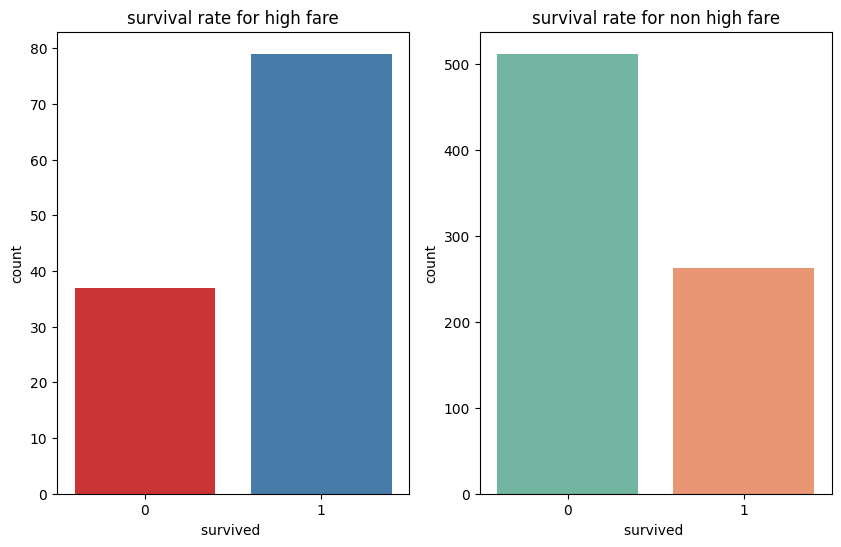

In [38]:
plt.figure(figsize = (10,6))   #at a time two figures can be drawn

plt.subplot(1,2,1)
sns.countplot(data = outliers, x = 'survived', palette = 'Set1')
plt.title("survival rate for high fare")
plt.xlabel("survived ")
plt.ylabel("count")

plt.subplot(1,2,2)
sns.countplot(data = non_outliers, x = 'survived', palette= 'Set2')
plt.title("survival rate for non high fare")
plt.xlabel("survived ")
plt.ylabel("count")


#19. Are there any gender-based differences in survival within each class (Pclass)?

<Axes: xlabel='pclass', ylabel='count'>

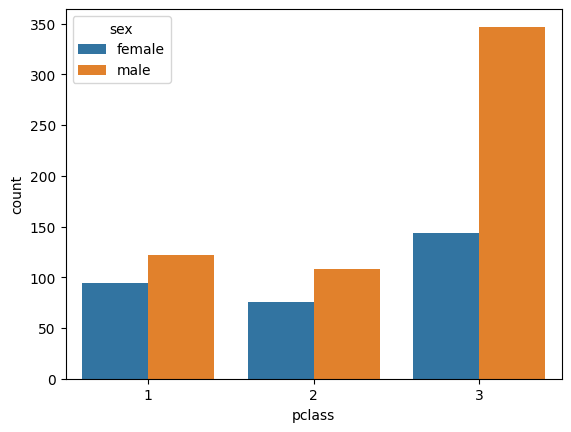

In [39]:
sns.countplot(data = titanic, x= 'pclass', hue = "sex")

In [40]:
survival_rate = titanic.groupby(['pclass', 'sex'])['survived'].mean().reset_index()

In [41]:
survival_rate

,pclass,sex,survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


#20. How does survival vary among passengers who embarked from different ports (Embarked) within the same class?

<Axes: xlabel='embarked', ylabel='count'>

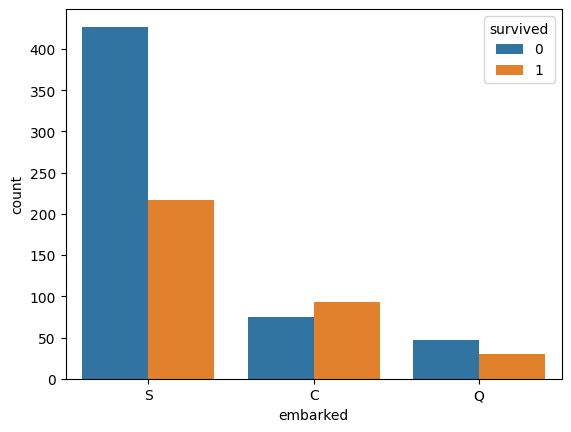

In [42]:
sns.countplot(data = titanic, x= 'embarked', hue = "survived")

In [43]:
survival_rate = titanic.groupby(['embarked', 'survived'])['age'].mean().reset_index()

In [44]:
survival_rate

,embarked,survived,age
0,C,0,33.666667
1,C,1,28.973671
2,Q,0,30.325000
3,Q,1,22.500000
4,S,0,30.203966
5,S,1,28.113184
